# Preliminaries

## Load

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import sklearn as skl
import scipy as sp
import scipy.cluster.hierarchy
from sklearn import datasets

In [3]:
from skimage import color
from colorsys import rgb_to_hsv

In [4]:
import sys
sys.path.append('/home/andy/Documents/Research/pnri/Helpers/')

import importlib
pcl = importlib.import_module('protoclust')
cplt = importlib.import_module('colonyplotting')

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Reload 

In [6]:
pcl = importlib.reload(pcl)
cplt = importlib.reload(cplt)

## Utilities

In [7]:
def labelXYZ(ax, xlabel, ylabel, zlabel=None, params={}):
    ax.set_xlabel(xlabel, **params)
    ax.set_ylabel(ylabel, **params)
    if zlabel:
        ax.set_zlabel(zlabel, **params)
    return ax

# Example 1: Faces

In [8]:
faces = skl.datasets.fetch_olivetti_faces()
X = faces.data
n,d = X.shape # d = 64x64
Y = faces.target
n,d

(400, 4096)

## Inspect SVD

In [9]:
U,S,Vt = np.linalg.svd(X - np.mean(X, axis=0))

<IPython.core.display.Javascript object>


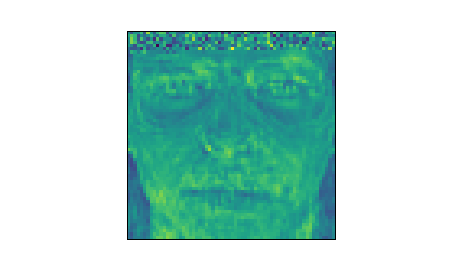

In [10]:
fig, ax = plt.subplots(1, figsize=[5,3])
ax.imshow(Vt[:,0].reshape(64,64))
cplt.clean_ax(ax)

<IPython.core.display.Javascript object>


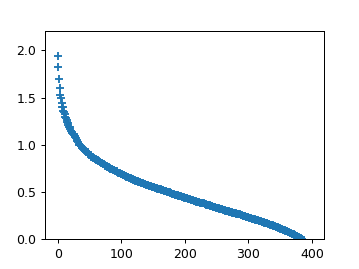

(0, 2.2)

In [11]:
fig,ax = plt.subplots(1, figsize=[4,3])
ax.scatter(list(range(len(S))), np.log10(S), marker='+')
ax.set_ylim([0,2.2])

<IPython.core.display.Javascript object>


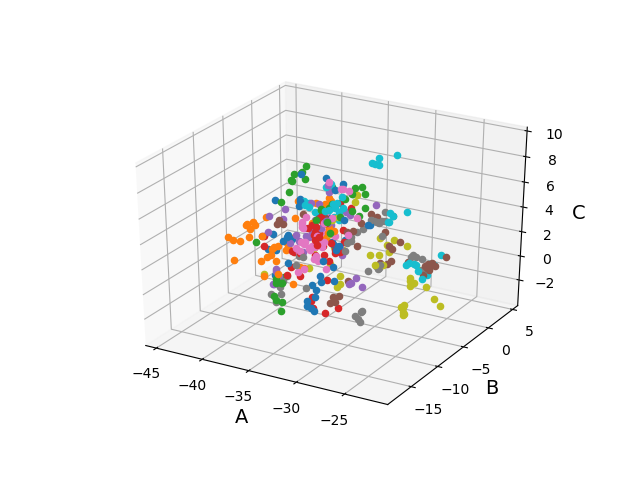

In [14]:
fig= plt.figure()
ax = fig.add_subplot(111, projection='3d')
pcX = X@Vt.T[:,:3]
colors, cnorm = [mpl.cm.get_cmap('tab10'), np.max(Y)]
for i,j,k,c in zip(pcX[:,0], pcX[:,1], pcX[:,2],Y):
    ax.scatter(i,j,k,color=colors(c/cnorm))
labelXYZ(ax, 'A','B','C', {'fontsize': 14});

## An example of protoclust

In [11]:
pcl = importlib.reload(pcl)

In [12]:
dm = pcl.distance_matrix(X, lambda x,y: np.sqrt(np.sum(np.square(x-y))))

In [31]:
len((slice(0,4,1),slice(0,4,1)))

2

In [97]:
Z, clustering_data = pcl.protoclust(dm)
clustering, clustering_centers, clustering_distances = [np.array(i) for i in clustering_data]

In [98]:
T = sp.cluster.hierarchy.fcluster(Z, t=10, criterion='distance')
indices,_ = sp.cluster.hierarchy.leaders(Z,T)
print(len(indices))

29


In [99]:
np.sort(indices)

array([651, 678, 681, 684, 702, 706, 707, 714, 719, 720, 733, 734, 736,
       737, 743, 745, 747, 748, 755, 762, 765, 766, 770, 775, 776, 780,
       781, 788, 792], dtype=int32)

In [89]:
old = np.sort(indices)
old

array([403, 582, 599, 609, 619, 653, 702, 703, 728, 729, 730, 731, 735,
       736, 737, 743, 745, 746, 751, 754, 756, 757, 760, 762, 764, 767,
       779, 780, 787], dtype=int32)

<IPython.core.display.Javascript object>


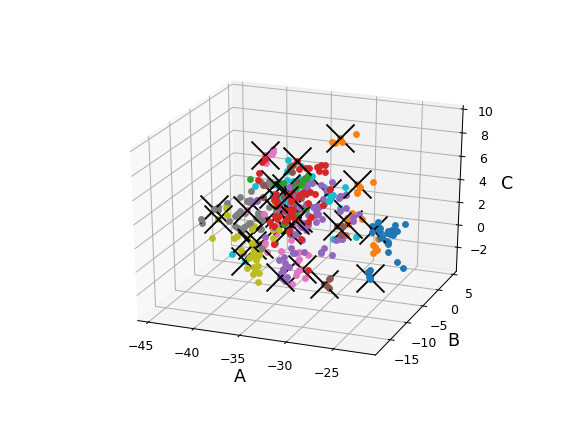

In [100]:
colors, cnorm = [mpl.cm.get_cmap('tab10'), len(indices)]

fig= plt.figure()
ax = fig.add_subplot(111, projection='3d')
pcX = X@Vt.T[:,:3]
for index, row in enumerate(pcX):
    c='gray'
    x1,x2,x3 = row
    ax.scatter(x1,x2,x3,color=colors(T[index]/cnorm))

for center in clustering_centers[indices]:
    x1,x2,x3 = pcX[center,:3]
    ax.scatter(x1,x2,x3, color='k', s=500, marker='x')
             
labelXYZ(ax, 'A','B','C', {'fontsize': 14});

<IPython.core.display.Javascript object>


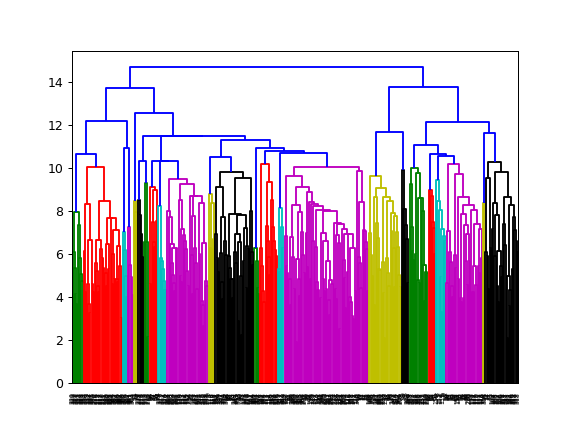

In [75]:
fig = plt.figure()
sp.cluster.hierarchy.dendrogram(Z, truncate_mode='level', distance_sort=True);

<IPython.core.display.Javascript object>


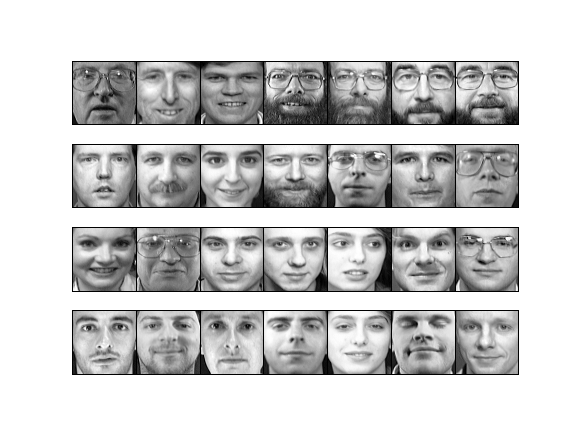

In [104]:
fig, ax = plt.subplots(4,7)
fig.subplots_adjust(wspace=0, hspace=0)
for i,row in enumerate(clustering_centers[indices]):
    if len(ax.flatten()) == i:
        break
    im = X[row].reshape(64,64)
#     im = color.gray2rgb(X[row].reshape(64,64))
#     c_hsv = rgb_to_hsv(*colors(T[row]/cnorm)[:-1])
#     im = cplt.colorize(im, c_hsv[0], .75*c_hsv[1])
    ax.flatten()[i].imshow(im, cmap='gray')
    cplt.clean_ax(ax.flatten()[i])

# Example 2: Words

In [96]:
from scipy.io import loadmat

In [97]:
words = loadmat('/home/andy/Downloads/grolier15276.mat')
X = words['grolier'].toarray()
n,d = X.shape

In [92]:
n,d

(15276, 30991)

In [98]:
def pairwise_dissimilarity(x,y):
    return 1 - np.sum(x*y)/(np.linalg.norm(x)*np.linalg.norm(y))

In [102]:
clustering, clustering_data = pcl.protoclust(X,  pairwise_dissimilarity, verbose=True)

Compute distance matrix...


KeyboardInterrupt: 

In [ ]:
clustering, clustering_centers, clustering_distances = [np.array(i) for i in clustering_data]